In [10]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
import pandas as pd
import requests
from PIL import Image as pil_image

# Determine the size of each image
from os.path import isfile

%matplotlib inline

# BackGround

After centuries of intense whaling, recovering whale populations still have a hard time adapting to warming oceans and struggle to compete every day with the industrial fishing industry for food.

To aid whale conservation efforts, scientists use photo surveillance systems to monitor ocean activity. They use the shape of whales’ tails and unique markings found in footage to identify what species of whale they’re analyzing and meticulously log whale pod dynamics and movements. For the past 40 years, most of this work has been done manually by individual scientists, leaving a huge trove of data untapped and underutilized.

In this competition, you’re challenged to build an algorithm to identify individual whales in images. You’ll analyze Happywhale’s database of over 25,000 images, gathered from research institutions and public contributors. By contributing, you’ll help to open rich fields of understanding for marine mammal population dynamics around the globe.

Note, this competition is similar in nature to this competition with an expanded and updated dataset.

We'd like to thank Happywhale for providing this data and problem. Happywhale is a platform that uses image process algorithms to let anyone to submit their whale photo and have it automatically identified. 

# Goal
*Identify a Whale by its tail.* 

# Dataset Description

This training data contains thousands of images of humpback whale flukes. Individual whales have been identified by researchers and given an Id. The challenge is to predict the whale Id of images in the test set. What makes this such a challenge is that there are only a few examples for each of 3,000+ whale Ids.

# File descriptions

* train.zip - a folder containing the training images
* train.csv - maps the training Image to the appropriate whale Id. Whales that are not predicted to have a label identified * in the training data should be labeled as new_whale.
* test.zip - a folder containing the test images to predict the whale Id
* sample_submission.csv - a sample submission file in the correct format


## Showing some images

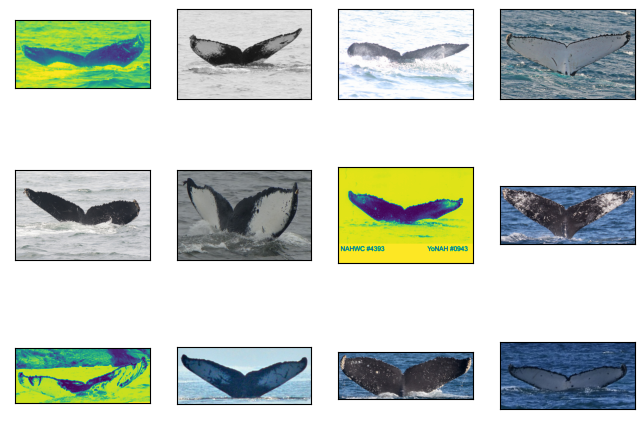

In [11]:
import os
fig = plt.figure(figsize=(8, 8), dpi=100,facecolor='w', edgecolor='k')
train_imgs = os.listdir("./train/")
for idx, img in enumerate(np.random.choice(train_imgs, 12)):
    ax = fig.add_subplot(4, 20//5, idx+1, xticks=[], yticks=[])
    im = pil_image.open("./train/" + img)
    plt.imshow(im)

## Importing Dataset

In [16]:
# load image data
#image name
train_df = pd.read_csv('./train.csv')
train_df.head(10)

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale
5,0006e997e.jpg,new_whale
6,000a6daec.jpg,w_dd88965
7,000f0f2bf.jpg,new_whale
8,0016b897a.jpg,w_64404ac
9,001c1ac5f.jpg,w_a6f9d33


In [17]:
train_df.tail(10)

,Image,Id
25351,ffd61cded.jpg,new_whale
25352,ffd7a6f5a.jpg,w_84c23bb
25353,ffdddcc0f.jpg,new_whale
25354,ffe52d320.jpg,w_bc285a6
25355,ffe7560cd.jpg,w_6d8b67b
25356,ffef89eed.jpg,w_9c506f6
25357,fff7faf61.jpg,w_9cf0388
25358,fff9002e0.jpg,w_bd1c3d5
25359,fffcde6fe.jpg,w_9f30885
25360,fffde072b.jpg,new_whale


In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25361 entries, 0 to 25360
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   25361 non-null  object
 1   Id      25361 non-null  object
dtypes: object(2)
memory usage: 396.4+ KB


In [15]:
# rows and columns
train_df.shape

(25361, 2)

In [19]:
train_df.describe()

,Image,Id
count,25361,25361
unique,25361,5005
top,0000e88ab.jpg,new_whale
freq,1,9664


### Creating x_train and y_train

In [23]:
y_train = train_df["Id"]

# drop the id column
X_train = train_df.drop(['Id'], axis=1)
y_train.head()

0    w_f48451c
1    w_c3d896a
2    w_20df2c5
3    new_whale
4    new_whale
Name: Id, dtype: object

In [24]:
X_train.head()

,Image
0,0000e88ab.jpg
1,0001f9222.jpg
2,00029d126.jpg
3,00050a15a.jpg
4,0005c1ef8.jpg
